In [90]:
import vk
from IPython.display import Image
from IPython.core.display import HTML
import networkx as nx
import time
import matplotlib.pyplot as plt


class WebService:
    
    def __init__(self):
        self.token = '2e8afce6f0f7ace2cc77737187540e29b857c40379f25f6711ee9b315ff687d383d3a8a3db3b378498cab'
        self.session = vk.Session(access_token=self.token)
        self.api = vk.API(self.session, v='5.101')
        
    def get_friends(self, id_: int, count=None) -> [int]:
        friends = self.api.friends.get(user_id=id_, count=count)
        return friends['items']
    
    def get_user_name(self, id_: int) -> str:
        user = self.api.users.get(user_id=id_)
        return user
    
    def get_user_photo(self, id_):
        photo = self.api.users.get(user_id=id_,fields='photo_100')
        return photo[0]
    
    def show_user_photo(self, id_):
        response = self.get_user_photo(id_)
        return Image(url= response['photo_100'], width=100, height=100)

In [2]:
# class node :
#     def __init__(self, id, root = None, r_brother = None, childrens = None ) :
#         self.id = id
#         self.root = root
#         self.r_brother = r_brother
#         self.childrens = childrens

In [3]:
# class tree :
#     def __init__(self, root) :
#         self.root = root
        
#     def add_child(self, parent_id : int, child_node : node) :
#         parent = self.find_node(parent_id)
#         if (root != None) :
#             child_node
#         pass
    
#     def find_node(self,id : int) -> node :
#         if (self.root.id == id) :
#             return self.root
#         left_child = root.childrens[0]
#         while (left_child != None ) :
#             current_node = left_child
#             while(current_node!= None) :
                
#                 if(current_node.id == id) :
#                     print(current_node.id)
#                     return current_node
                
#                 if ( current_node.childrens is not None) :
#                     for child in current_node.childrens :
#                         if (child.id == id) :
#                             return child
#                 current_node = current_node.r_brother    
#             left_child = left_child.childrens[0] if left_child.child is None else None
        
        


In [35]:
# def create_tree(start_user_id) :
   
#     ws.get_user_name(55564167)   
#     ids = [ 
#         559640345,# - кирилл
#         29759351,# - Павел
#         120435774,# - Алена
#         78517271,# - Олег
#         55564167,# - Артем 
#         202514864,# - Артем 
#         79818398,# - Никита
#         18214699,# - Раиль
#         25689500,# - Альберт
#         322913600,# - Иван
#         32418429,# - Игнат
#         32784038,# - Глеб
#         55355150,# - Роман
#         65817487,# - Алекс
#         76637395,# - Роман
#         31710423,# - Василий
#         557916962,# - Максим
#         44907648# - Миланочка
#     ]
#     step_count = 0
#     userId = start_user_id
#     items = ws.get_friends(start_user_id)
#     while ids and step_count < 5 :
#         for value in items:
#             if (value in id ) :
#                 pass
            
# ws = web_service()         
# ws.show_user_photo(55564167)


In [60]:
IDS = (
    559640345,# - кирилл
    29759351,# - Павел
    120435774,# - Алена
    78517271,# - Олег
    55564167,# - Артем 
    202514864,# - Артем 
    79818398,# - Никита
    18214699,# - Раиль
    25689500,# - Альберт
    322913600,# - Иван
    32418429,# - Игнат
    32784038,# - Глеб
    55355150,# - Роман
    65817487,# - Алекс
    76637395,# - Роман
    31710423,# - Василий
    557916962,# - Максим
    44907648# - Миланочка
)

COUNT = 30
DEEP = 3

In [66]:
graph = nx.Graph()
ws = WebService()

In [67]:
users = list(IDS)
edges = []


for id_ in ids:
    try:
        friends = ws.get_friends(id_, count=COUNT)
        users.extend(friends)
        edges.extend([(id_, fr) for fr in friend])
        
        time.sleep(12)
    except vk.api.VkAPIError as err:
        print(err)

30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '31710423', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '557916962', 'count': '30'}


In [69]:
k = 1
new_users = list(filter(lambda x: x not in IDS, users))

while k <= DEEP:
    temp = []
    print(f'Iteration: {k}')
    
    for user in new_users:
        try:
            friend = ws.get_friends(user, count=COUNT)
            users.extend(friends)
            temp.extend(friends)
            edges.extend([(id_, fr) for fr in friend])
            
            time.sleep(12)
        except vk.api.VkAPIError as err:
            print(err)
            
    new_users = list(filter(lambda x: x not in users, temp))
    users.extend(new_users)
    k += 1

Iteration: 1
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '9883526', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '14209118', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '25701289', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '35637086', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '2871924', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '17512545', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '23185438', 'count': '30'}
30. This profile is pri

30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '631769', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '5078358', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '13951737', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '21390435', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '27338502', 'count': '30'}
30. This profile is private. request_params = {'method': 'friends.get', 'oauth': '1', 'v': '5.101', 'user_id': '48369482', 'count': '30'}
Iteration: 2
Iteration: 3


In [71]:
import json

# with open('new_ids', 'w') as f:
#     json.dump(users, f)
    
# with open('new_edges', 'w') as f:
#     json.dump(edges, f)

In [73]:
graph.add_nodes_from(users)
graph.add_edges_from(edges)

In [81]:
paths = []
for i, v in enumerate(IDS):
    if v != IDS[-1]:
        for j in range(1, len(IDS) - i - 1):
            try:
                path = nx.shortest_path(graph, IDS[i], IDS[i + j])
                paths.extend(path)
            except nx.NodeNotFound as err:
                print(err)
            except nx.NetworkXNoPath as err:
                print(err)

No path between 559640345 and 557916962.
No path between 29759351 and 557916962.
No path between 120435774 and 557916962.
No path between 78517271 and 557916962.
No path between 55564167 and 557916962.
No path between 202514864 and 557916962.
No path between 79818398 and 557916962.
No path between 18214699 and 557916962.
No path between 25689500 and 557916962.
No path between 322913600 and 557916962.
No path between 32418429 and 557916962.
No path between 32784038 and 557916962.
No path between 55355150 and 557916962.
No path between 65817487 and 557916962.
No path between 76637395 and 557916962.
No path between 31710423 and 557916962.


In [84]:
nodes_to_delete = list(filter(lambda x: x not in set(paths), users))

In [110]:
graph.edges()

EdgeView([(559640345, 631769), (559640345, 31710423), (29759351, 631769), (29759351, 31710423), (120435774, 631769), (120435774, 31710423), (78517271, 631769), (78517271, 31710423), (55564167, 631769), (55564167, 31710423), (202514864, 631769), (202514864, 31710423), (79818398, 631769), (79818398, 31710423), (18214699, 631769), (18214699, 31710423), (25689500, 631769), (25689500, 31710423), (322913600, 631769), (322913600, 31710423), (32418429, 631769), (32418429, 31710423), (32784038, 631769), (32784038, 31710423), (55355150, 631769), (55355150, 31710423), (65817487, 631769), (65817487, 31710423), (76637395, 631769), (76637395, 31710423)])

In [87]:
graph.remove_nodes_from(nodes_to_delete)

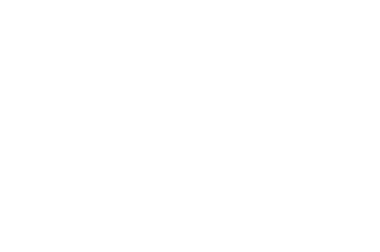

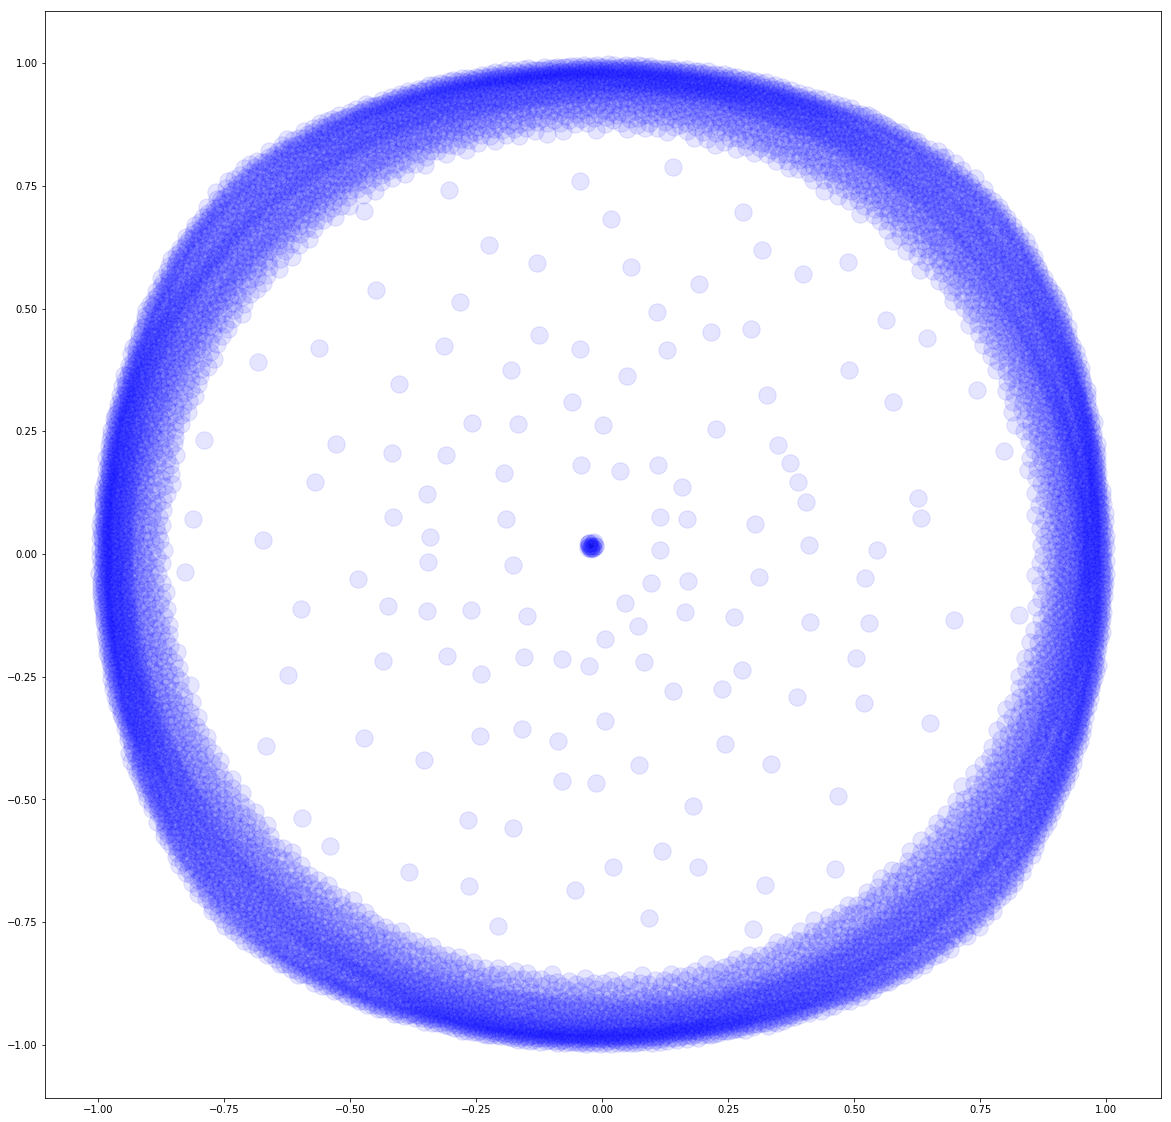

In [108]:
plt.figure()

plt.axis('off')
fig = plt.figure(figsize=(20,20))

pos=nx.spring_layout(graph)
# bc = list(nx.betweenness_centrality(graph).values())
# alphas = [i * 2 for i in bc]
d = nx.degree(g)

nx.draw_networkx_nodes(graph, pos, alpha=0.1, node_color='blue' node_size=[v * 100 for v in d.values()])
nx.draw_networkx_edges(graph, pos, alpha=0.4, edge_color='gray')

plt.savefig("path.png")
plt.show()

In [107]:
len(nx.betweenness_centrality(graph).values())

7461